In [1]:
""""
This script aims to train a digit-recognizer on the mnist handwritten numbers dataset
The tutorial that will be used as a guideline is: https://www.tensorflow.org/tutorials/keras/basic_classification
"""

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")

y = train_data["label"]
X = train_data.drop(columns=["label"])

# Rescale between 0 and 1
X = X/255.0
test_data = test_data/255.0

# Convert to numpy arrays
X = X.values
y = y.values

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [3]:
model = keras.Sequential([
    # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# Train model
model.fit(X_train, y_train, epochs=1)

   32/28140 [..............................] - ETA: 3s - loss: 5.3306e-06 - acc: 1.0000

  736/28140 [..............................] - ETA: 2s - loss: 5.2673e-04 - acc: 1.0000

 1376/28140 [>.............................] - ETA: 2s - loss: 0.0069 - acc: 0.9985    

 2080/28140 [=>............................] - ETA: 1s - loss: 0.0061 - acc: 0.9981

 2912/28140 [==>...........................] - ETA: 1s - loss: 0.0045 - acc: 0.9986

 3744/28140 [==>...........................] - ETA: 1s - loss: 0.0036 - acc: 0.9989

 4512/28140 [===>..........................] - ETA: 1s - loss: 0.0035 - acc: 0.9989

 5120/28140 [====>.........................] - ETA: 1s - loss: 0.0032 - acc: 0.9990

 5824/28140 [=====>........................] - ETA: 1s - loss: 0.0029 - acc: 0.9991

 6432/28140 [=====>........................] - ETA: 1s - loss: 0.0027 - acc: 0.9992

 7200/28140 [======>.......................] - ETA: 1s - loss: 0.0028 - acc: 0.9992

 8000/28140 [=======>......................] - ETA: 1s - loss: 0.0026 - acc: 0.9992

 8832/28140 [========>.....................] - ETA: 1s - loss: 0.0027 - acc: 0.9992

 9632/28140 [=========>....................] - ETA: 1s - loss: 0.0025 - acc: 0.9993

10432/28140 [==========>...................] - ETA: 1s - loss: 0.0024 - acc: 0.9993

11232/28140 [==========>...................] - ETA: 1s - loss: 0.0022 - acc: 0.9994

12000/28140 [===========>..................] - ETA: 1s - loss: 0.0027 - acc: 0.9992

12768/28140 [============>.................] - ETA: 1s - loss: 0.0031 - acc: 0.9991

13504/28140 [=============>................] - ETA: 1s - loss: 0.0032 - acc: 0.9990

14272/28140 [==============>...............] - ETA: 0s - loss: 0.0037 - acc: 0.9989

15008/28140 [===============>..............] - ETA: 0s - loss: 0.0037 - acc: 0.9989

15776/28140 [===============>..............] - ETA: 0s - loss: 0.0035 - acc: 0.9989

16544/28140 [================>.............] - ETA: 0s - loss: 0.0037 - acc: 0.9989

17280/28140 [=================>............] - ETA: 0s - loss: 0.0036 - acc: 0.9988

18048/28140 [==================>...........] - ETA: 0s - loss: 0.0038 - acc: 0.9988

18784/28140 [===================>..........] - ETA: 0s - loss: 0.0039 - acc: 0.9988

19552/28140 [===================>..........] - ETA: 0s - loss: 0.0039 - acc: 0.9988

20288/28140 [====================>.........] - ETA: 0s - loss: 0.0038 - acc: 0.9989

21024/28140 [=====================>........] - ETA: 0s - loss: 0.0040 - acc: 0.9988

21728/28140 [======================>.......] - ETA: 0s - loss: 0.0042 - acc: 0.9987

22528/28140 [=======================>......] - ETA: 0s - loss: 0.0041 - acc: 0.9987

23328/28140 [=======================>......] - ETA: 0s - loss: 0.0040 - acc: 0.9987

24160/28140 [========================>.....] - ETA: 0s - loss: 0.0039 - acc: 0.9987

24992/28140 [=========================>....] - ETA: 0s - loss: 0.0041 - acc: 0.9987

25856/28140 [==========================>...] - ETA: 0s - loss: 0.0041 - acc: 0.9987

26720/28140 [===========================>..] - ETA: 0s - loss: 0.0040 - acc: 0.9987

27552/28140 [============================>.] - ETA: 0s - loss: 0.0039 - acc: 0.9988

28140/28140 [==============================] - 2s 67us/sample - loss: 0.0038 - acc: 0.9988


In [7]:
# Validate on test
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

   32/13860 [..............................] - ETA: 9s - loss: 0.0480 - acc: 0.9688

 1984/13860 [===>..........................] - ETA: 0s - loss: 0.2025 - acc: 0.9748

 3744/13860 [=======>......................] - ETA: 0s - loss: 0.1890 - acc: 0.9720

 5792/13860 [===========>..................] - ETA: 0s - loss: 0.1793 - acc: 0.9729

 7648/13860 [===============>..............] - ETA: 0s - loss: 0.1965 - acc: 0.9731

 9728/13860 [====================>.........] - ETA: 0s - loss: 0.1859 - acc: 0.9744

10880/13860 [======================>.......] - ETA: 0s - loss: 0.1818 - acc: 0.9745

12064/13860 [=========================>....] - ETA: 0s - loss: 0.1830 - acc: 0.9743

13664/13860 [============================>.] - ETA: 0s - loss: 0.1817 - acc: 0.9743

13860/13860 [==============================] - 0s 32us/sample - loss: 0.1820 - acc: 0.9742


Test accuracy: 0.97424245


In [8]:
predictions = np.argmax(model.predict(test_data), axis=1)
predictions

array([2, 0, 9, ..., 3, 9, 2])

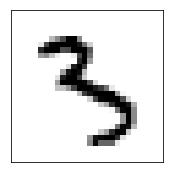

In [77]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)


plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, test_data.values.reshape((len(test_data.values), 28, 28)))

In [9]:
image_id = np.arange(1, len(test_data) +1)
d = {"ImageId": image_id, "Label": predictions}
results = pd.DataFrame(data=d, index=image_id).set_index("ImageId")
results.to_csv("data/results.csv")